# Final Project
## Kyle O'Leary
### 12/10/2024

1. For my final project I am looking at a topic that is hot in the sports world. NFL and protection for players. Concussions have been brutal in the NFL, with some players concussions resulting in getting CTE, Chronic Traumatic Encephalopathy. Some players have died from CTE, Ray Abruzzese, Phillip Adams, George Andrie, and more. The purpose of this analysis is to see how common concussions are through this data set. For my hypothesis, I am going to attempt to see if concussions have been happening more or less often. I personaly think that they have been happening more often because football is just a very physical sport and players now in my opinion seem way stronger than back then, like 80's and 90's. I am going to use data from a user named Alice, from Github (https://github.com/ali-ce/datasets/blob/master/NFL/Concussion%20Injuries%202012-2014.csv) to test my hypothesis. The data set is about concussions in the NFL ranging from 2012-2014. 

2. First I am importing the sources I need to complete this data analysis.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
# Importing pandas, matplotlib, seaborn, and numpy

3. Here I am importing the data file I need, which again is from a user name Alice, from github (https://github.com/ali-ce/datasets/blob/master/NFL/Concussion%20Injuries%202012-2014.csv), and displaying it using .read_csv

In [21]:
ad = pd.read_csv('file:///Users/kyleoleary/Downloads/Concussion%20Injuries%202012-2014.csv')
ad.head()

# reading file using .read_csv and displaying it with .head to start

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


4. Now that I have the data file ready, I use .keys to see all the keys in this data sets dictionary.

In [22]:
ad.keys

# using .keys to view all of the keys in the dictionary

<bound method NDFrame.keys of                                                     ID             Player  \
0    Aldrick Robinson - Washington Redskins vs. Tam...   Aldrick Robinson   
1    D.J. Fluker - Tennessee Titans vs. San Diego C...        D.J. Fluker   
2    Marquise Goodwin - Houston Texans vs. Buffalo ...   Marquise Goodwin   
3    Bryan Stork - New England Patriots vs. Buffalo...        Bryan Stork   
4    Lorenzo Booker - Chicago Bears vs. Indianapoli...     Lorenzo Booker   
..                                                 ...                ...   
387  Eric Weddle - Baltimore Ravens vs. San Diego C...        Eric Weddle   
388  Blidi Wreh-Wilson - Indianapolis Colts vs. Ten...  Blidi Wreh-Wilson   
389  Josh Sitton - Green Bay Packers vs. Tennessee ...        Josh Sitton   
390  Nate Solder - New England Patriots vs. Clevela...        Nate Solder   
391  Tony Jefferson - Arizona Cardinals vs. Philade...     Tony Jefferson   

                     Team                    

5. After seeing the keys, I use .columns to see what topics data were collected in this data set. This also makes it particularly easier to come back to and reference when choosing what data I am going to use for bar plots.

In [23]:
ad.columns

# looking at the index using .columns and seeing the columns headers of the data frame so I can refer to these when creating plots

Index(['ID', 'Player', 'Team', 'Game', 'Date', 'Opposing Team', 'Position',
       'Pre-Season Injury?', 'Winning Team?', 'Week of Injury', 'Season',
       'Weeks Injured', 'Games Missed', 'Unknown Injury?',
       'Reported Injury Type', 'Total Snaps', 'Play Time After Injury',
       'Average Playtime Before Injury'],
      dtype='object')

6. I now do a quick .shape to see how large the data set is. So it says it has 18 columns, which we could see the names of those columns when we used .columns, and 392 rows.

In [24]:
ad.shape

# seeing how the shape and how big the data frame is using .shape

(392, 18)

7. Now we can officially start looking at the data by displaying it using matplotlib as plt and seaborn as sns. To start off, I want to see the amount of injuries at each position. I believe this is a good starting point to test my hypothesis as we can get an idea for which NFL Positions are more prone to injuries. Since I want to see the amount of injuries at each position, I took the data column "NFL Positions" and used .value_counts(), which counts the unique value of each position in the "NFL Positions" column. I then used .barblot to create the graph.

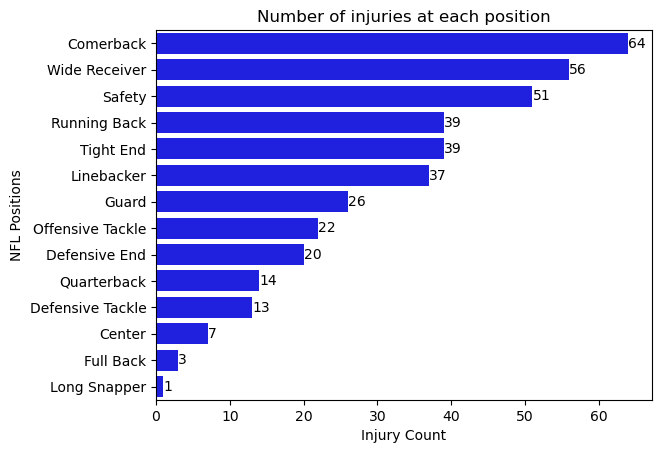

In [25]:
ax1 = ad['Position'].value_counts()
graph = sns.barplot(y = ax1.index, x = ax1.values, color = 'blue')
plt.bar_label(graph.containers[0])
plt.title('Number of injuries at each position')
plt.ylabel('NFL Positions')
plt.xlabel('Injury Count')
plt.show()

8. Based off these results, we can see that the cornerback position is the most prone to injuries with an astounding 64 injuries recorded during 2012-2014. Also based off these results, you can see the more physical contact there is at each position, the more likely they are to get an injury. Example, with cornerback being the most prone to injuries, as we go down the graph, the less physical contact there is at each position leading to a lesser amount of injuries, with long snapper having the least amount of injuries at 1 injury, as they also have the least amount of physical contact at this position.

9. Next, I wanted to see the injury types that were recorded since we now know the amount of injuries at each position. This will help get a better understanding of what types of injuries these players endured during the 2012-2014 seasons. For this graph, I took the data column "Reported Injury Type", and used .value_counts() to display the unique value of Reported Injury Types in the data column. I then used .barplot to create the graph.

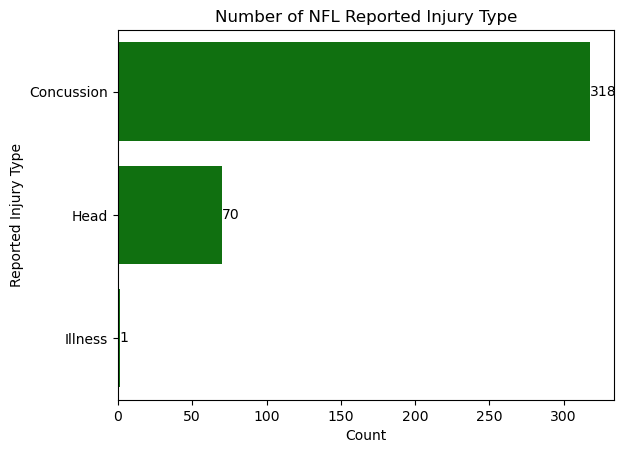

In [26]:
ax2 = ad['Reported Injury Type'].value_counts()
graph = sns.barplot(y = ax2.index, x = ax2.values, color = 'green')
plt.bar_label(graph.containers[0])
plt.title('Number of NFL Reported Injury Type')
plt.ylabel('Reported Injury Type')
plt.xlabel('Count')
plt.show()

10. Based off these results, we can see 318 of the recorded injuries were concussions, 70 were head injuries, and 1 was due to illness. Head and concussions kind of go hand in hand, they both involve contact to the head of course, but they are different because while a head injury is an injury to the head, a concussion is an injury to the brain. We can see that the number of concussions outweighs the amount of other injury types by a lot. This is sad to see as concussions are one of the worst types of injuries if not the worst as it can lead to a lifelong brain affection.

11. After finding out the types of injuries that were recorded, I wanted to see if there were any injuries that were recorded that were unknown. Knowing if there are any unknown injury types in this data set is crucial because in a way it tests to see how reliable the data set is. If there are a lot of unkown injuries recorded in a data set that is focues toward a specific injury, in this case, concussion, it could raise questions about how reliable the data set is. To display the amount of unknown injuries, I took the data column "Unknown Injury?" and used .value_counts() to count the unique value of the Unknown Injury? data column. I then used .barplot to create the graph.

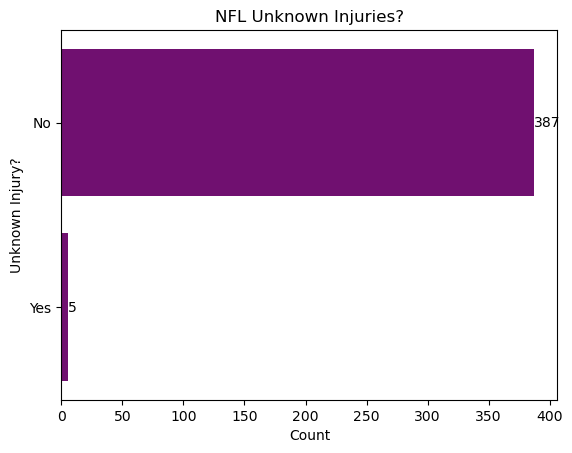

In [27]:
ax3 = ad['Unknown Injury?'].value_counts()
graph = sns.barplot(y = ax3.index, x = ax3.values, color = 'purple')
plt.bar_label(graph.containers[0])
plt.title('NFL Unknown Injuries?')
plt.ylabel('Unknown Injury?')
plt.xlabel('Count')
plt.show()

12. Analyzing these results, this is a good sign to see. There were 387 injuries that were known and only 5 injuries that were unknown. This tells us that the data that was recorded specifically for concussions in the NFL were almost all concussion related. In other words, there were not an abundant amount of injuries such as broken bones or ACL/MCL tears and such in a data set that is meant for concussions.

13. Now that I have gathered all the information I needed about the injuries, I want to see how many injuries took place during the pre-season. I want to see this data because an NFL Pre-Season is only three games whereas the regular season is 17 games, and I want to see how the pre-season injuries fare up against the regular season. To make this graph I took the data column "Pre-Season Injury?" and used .valuecounts() to count the unique value of that data column. I then used .barplot to create the graph.

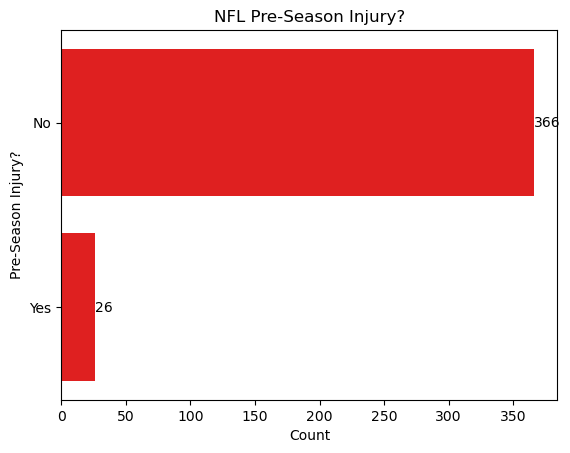

In [28]:
ax4 = ad['Pre-Season Injury?'].value_counts()
graph = sns.barplot(y = ax4.index, x = ax4.values, color = 'red')
plt.bar_label(graph.containers[0])
plt.title('NFL Pre-Season Injury?')
plt.ylabel('Pre-Season Injury?')
plt.xlabel('Count')
plt.show()

14. These results were kind of what I expected. If you take 17, because there are 17 regular season games, and divide that by 3 since there are only 3 pre-season games, and multiply 26 by the result of 17 divided by 3 since there were 26 injuries recorded during the pre-season, you get 147.3, which is the number of injuries there would be if the rate of pre-season injuries were a full season. The regular season itself, not the regular season if it were the pre-season injury rate, would still have more injuries. This does not surprise me since the pre-season games are not taken that serious since they are trying to still play hard but keep their players healthy for the regular season.

15. After gathering the information about the pre-season injuries, I wanted to see overall how many weeks these players were injured. I want to see this becuase concussions are an injury that typically take more than one week to recover from, so if there are any injuries where it took less that one week to recover from it would raise some questions about the data set.

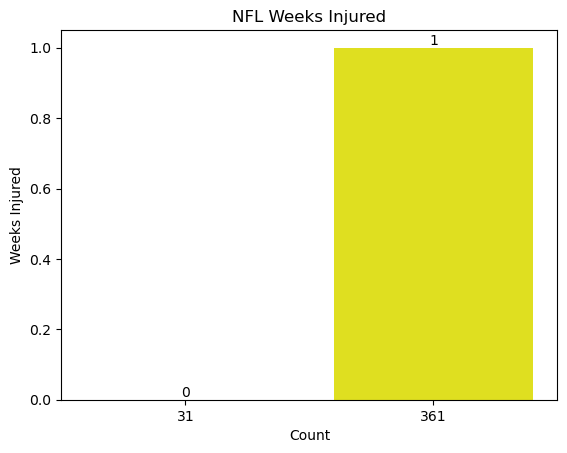

In [29]:
ax5 = ad['Weeks Injured'].value_counts()
graph = sns.barplot(y = ax5.index, x = ax5.values, color = 'yellow')
plt.bar_label(graph.containers[0])
plt.title('NFL Weeks Injured')
plt.ylabel('Weeks Injured')
plt.xlabel('Count')
plt.show()

16. Looking at these results, its just as I have suspected. All players were injured for more than one week. Even with the head injuries that were recorded, those usually take more than a week to recover from too as those need to be take care of carefully as it could be dangerous to go right back into a game after a head injury. I also was interested to see if that illness that was recorded earlier in the types of injuries would show up here as sometimes an illness takes less than a week to recover from, but in this case it seems that illness must have been pretty bad.

17. Now that I have seen the amount of weeks injured, I wanted to break that down into seasons. Now that I have seen the amount of weeks injured, I wanted to break that down into seasons. I want to see this data to get an idea of if the injuries that were recorded for the 2012-2014 seasons were getting better or worse. The .countplot function is used from seaborn and is used to display the amount of injuries.

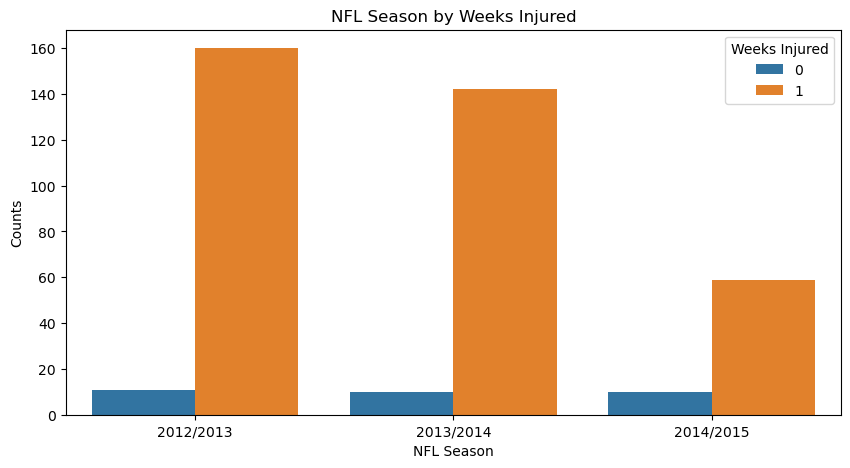

In [30]:
plt.figure(figsize = (10, 5))
ax6 = sns.countplot(x='Season', hue='Weeks Injured', data=ad)

for p in ax6.patches:
    ax6.annotate(text=p.get_height(), xy=(p.get_x()+0.2, p.get_height()+200), horizontalalignment='center', verticalalignment='top')

plt.title('NFL Season by Weeks Injured')    
plt.xlabel('NFL Season')
plt.ylabel('Counts')
plt.show()


18. According to this data, the amount of weeks injured actually DECREASED as the seasons went on. I found this information a little shocking. I honestly thought that the amount of weeks injured by season would increase since football is very physical. The only reason I could think of as to why it decreases is because there might have been a new helmet that was created that had more padding and safer for players. Other than that im not sure as to why this could be and this shocked me.

19. In conclusion, by taking many different looks at certain data through bar graphs, I am shocked to see that the trend of injuries per season, most importantly concussions per season is on a downward trend. I would have thought that the trend would be going up as it seems football gets more and more physical but I was wrong. It is a good thing I am wrong however as we do not wish to see concussions at all, at least keep them to low numbers. This reason could be due to new helmets with their new protection design and padding. Helmet companies are always looking to design helmets to protect players from getting head injuries and most importantly concussions. Today, we even see Guardian Caps which is extra padding that attaches to the players helmets and keeps them more protected. I am curious to see the data in the future for players that wear guardian caps compared to players that don't and see how they fare against each other.  Some limitations I had during this analysis is that this data is from over a near decade ago, so I am not exactly sure how the data would look now, but like I said considering companies are always improving helmet designs and technology to keep players safe, I still expect to see a downwards trend, especially after guardians caps came out and is the best helmet protection out currently.

1. Ignore this below, this graph would be my final graph of my analysis clearly showing the trend in the amount of injuries, just trying to figure out how to get it to work.

In [49]:
from datetime import datetime as dt

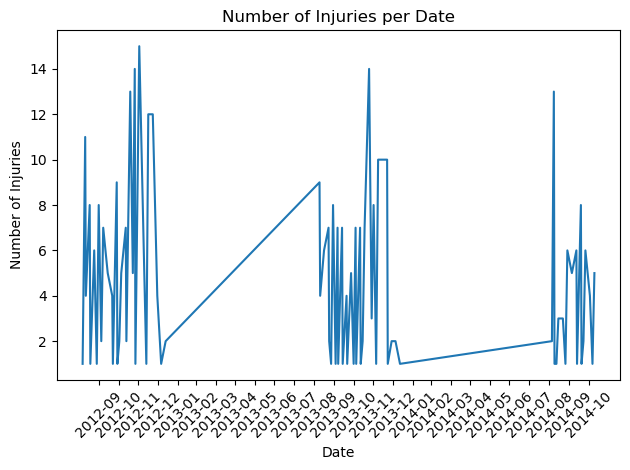

In [52]:
ad["Date"] = pd.to_datetime(ad["Date"])

by_date = ad.groupby(["Date"], sort=True)["ID"].count()

sns.lineplot(x=by_date.index, y=by_date.values)

xticks = pd.date_range(start=by_date.index.min(), end=by_date.index.max(), freq="ME")
plt.xticks(xticks, xticks.strftime('%Y-%m'), rotation=45)

plt.xlabel("Date")
plt.ylabel("Number of Injuries")
plt.title("Number of Injuries per Date")

plt.tight_layout()
plt.show()